# CS3244 Lecture 4: Linear Classification
- Instructor: Harold Soh
- TAs: Eugene Lim, Yang Mingyang
- Date: 8 May 2022
- Version: 0.1

DISCLAIMER: Code prepared for educational purposes and to illustrate the key concepts. This code is implemented following the standard equations which is not efficient and can be numerically unstable. As we go through, we will mention some ways things should be implemented. The code may also have errors. Please report bugs on our piazza site.  



In [ ]:
%matplotlib inline

import numpy as np

from numpy.random import randn, random_sample
from numpy import log, exp
from numpy.linalg import inv, pinv, norm

import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# some helper functions
# plot the data
def plotData(samples_0, samples_1, fig = None, ax = None):
  # plot the data
  if fig is None or ax is None:
    fig, ax = plt.subplots()
  ax.scatter(samples_0[:,0], samples_0[:,1], marker='x', color="r")
  ax.scatter(samples_1[:,0], samples_1[:,1], marker='o', color="b")

  ax.set_xlabel("$x_1$")
  ax.set_ylabel("$x_2$")
  
  return fig, ax

def logistic(z):
  return 1.0/(1.0 + exp(-z))

# this is the underlying classification function
def genData(N, theta_0, theta_1):
  # class 0
  mean_0, cov_0 = theta_0
  mean_1, cov_1 = theta_1
  samples_0 = np.random.multivariate_normal(mean_0, cov_0, int(N/2))
  samples_1 = np.random.multivariate_normal(mean_1, cov_1, int(N/2))

  return samples_0, samples_1


def splitSamples(X, T):
  s = []
  for y in [-1,1]:
    ind = (T[:,0] == y)
    s += [X[ind,:]]

  return s

def plotBoundary(w, xlims, ylims, fig=None, ax=None, color="g", fill=True):

  w0, w1, w2 = w
  # Calculate the intercept and gradient of the decision boundary.
  c = -w0/w2
  m = -w1/w2

  # Plot the data and the classification with the decision boundary.
  xmin, xmax = xlims#-3, 3
  ymin, ymax = ylims#-3, 4
  x = np.array([xmin, xmax])
  y = m*x + c

  if fig is None or ax is None:
    fig, ax = plt.subplots()

  ax.plot(x, y, color, lw=2)
  if fill:
    ax.fill_between(x, y, ymin, color='r', alpha=0.1)
    ax.fill_between(x, y, ymax, color='b', alpha=0.1)

  return fig, ax


def makeMatrixData(samples_0, samples_1, negclass=0):
  N0 = samples_0.shape[0]
  X0 = np.c_[np.ones(N0), samples_0]

  N1 = samples_1.shape[0]
  X1 = np.c_[np.ones(N1), samples_1]

  X = np.r_[X0, X1]
  T = np.r_[negclass*np.ones(N0).reshape(-1,1), np.ones(N1).reshape(-1,1)]

  return X,T

## Create Some Data

Let's create some data that we can classify 
In the plot below, we show the data we observe. We see two classes where blue points belong to Class 0 and the red crosses belong to Class 1. 

(15, 2)


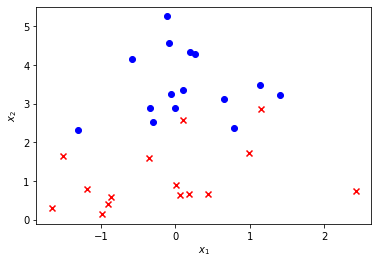

In [ ]:
# set seed
np.random.seed(5)

N = 30 # should be even number

# class 0 parameters
mean_0 = np.array([0.0, 1.0])
cov_0 = np.array([[1, 0], [0, 1]])
theta_0 = [mean_0, cov_0]

#class 1 parameters
mean_1 = np.array([0.0, 3.0])
cov_1 = np.array([[1, 0], [0, 1]])
theta_1 = [mean_1, cov_1]

# generate and plot
samples_0, samples_1 = genData(N, theta_0, theta_1)
plotData(samples_0, samples_1)
print(samples_0.shape)

## Linear Regression Model

To start, let us do linear regression. It's not completely right, but let's give it a try!

### Analytical Linear Regression Solution

Let's implement the solution we worked out in the previous lectures. First, we need to put all the data into one matrix. 

We set the targets as -1 for class 0 and +1 for class 1. 


In [ ]:
X, T = makeMatrixData(samples_0, samples_1, negclass=-1)

Recall, we derived the following formula: $\mathbf{w}_{ml} = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^\top \mathbf{t}$

In [ ]:
# we derived the following function in class. "@" is the symbol for matrix multiplication
lbd = exp(-20)
w_map = pinv(X.transpose() @ X + lbd*np.identity(X.shape[1]) ) @ X.transpose() @ T


In [ ]:
print(w_map)

[[-1.3202764 ]
 [-0.06044229]
 [ 0.57973562]]


Let's plot the function we leart.

(-1.0, 6.0)

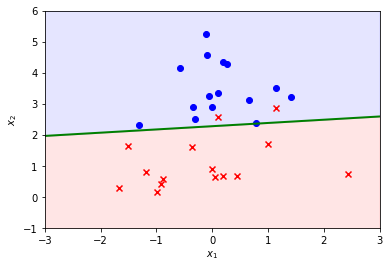

In [ ]:
fig, ax = plotBoundary(w_map, xlims=[-3,3], ylims=[-1,6])
plotData(samples_0, samples_1, fig=fig, ax=ax)
ax.set_xlim([-3,3])
ax.set_ylim([-1,6])

Hey, that's not bad! Looks like our linear regression worked. But what could go wrong. Let's try some different data...

[[ 0.83735979]
 [-0.06144226]
 [ 0.14371089]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d6af50b90>)

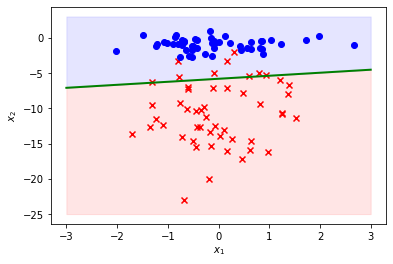

In [ ]:
N = 100
np.random.seed(3)
# class 0
mean2_0 = np.array([-0.0, -10.0])
cov2_0 = np.array([[0.5, 0], [0, 20]])
theta2_0 = [mean2_0, cov2_0]

# class 1
mean2_1 = np.array([0.0, -1.0])
cov2_1 = np.array([[1, 0], [0, 1]])
theta2_1 = [mean2_1, cov2_1]

# generate samples
samples2_0, samples2_1 = genData(N, theta2_0, theta2_1)

# make the right shapes
X2, T2 = makeMatrixData(samples2_0, samples2_1, negclass=-1)

# solve! 
w_map = pinv(X2.transpose() @ X2 + lbd*np.identity(X2.shape[1]) ) @ X2.transpose() @ T2
print(w_map)

# plot the boundary
fig, ax = plotBoundary(w_map, xlims=[-3,3], ylims=[-25,3])
plotData(samples2_0, samples2_1, fig=fig, ax=ax)


That's not a good boundary... What happened? Think about the error that linear regression is trying to minimize. Alternatively, think about the noise model of the linear regression model. 

## Logistic Regression
Next, let's try the logistic regression model we derived in class.

In [ ]:
# for logistic regression, make sure the classes are {0,1} and not {-1,1}

def learnLogisticRegModel(X, T, eta=0.1, lbd=0.01, maxitr=10000, tol=1e-4, report=1000):
  w_init = np.random.random([X.shape[1]])
  w = w_init
  for i in range(maxitr):
    gradL = np.zeros([X.shape[1]])
    for n in range(X.shape[0]):
      gradL += (logistic(np.dot(w, X[n,:])) - T[n]) * X[n,:] + lbd*w
    w = w - (eta/N)*gradL
    gdnorm = np.linalg.norm(gradL)
    if gdnorm < tol:
      print("Tolerance Reached")
      break
    if i %report == 0:
      print("Itr %d: Gradient norm "%(i), gdnorm)
  return w, w_init

In [ ]:

X, T = makeMatrixData(samples_0, samples_1)
w, w_init = learnLogisticRegModel(X,T)

print("Initial weights: ", w_init)
print("Learned weights: ", w)

Itr 0: Gradient norm  11.87756657424997
Itr 1000: Gradient norm  1.0876842026286806
Itr 2000: Gradient norm  0.38911046776211733
Itr 3000: Gradient norm  0.15988114018621447
Itr 4000: Gradient norm  0.068977855667327
Itr 5000: Gradient norm  0.03035072984138955
Itr 6000: Gradient norm  0.013467287468322792
Itr 7000: Gradient norm  0.0059977782499385035
Itr 8000: Gradient norm  0.0026755237906424425
Itr 9000: Gradient norm  0.0011943793990204505
Initial weights:  [0.00426643 0.24653547 0.70605618]
Learned weights:  [-3.36521895 -0.19349637  1.61303675]


(-1.0, 6.0)

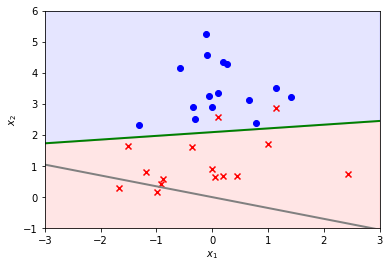

In [ ]:
# plot the boundary
fig, ax = plotBoundary(w_init, xlims=[-3,3], ylims=[-1,6], color="0.5", fill=False)
plotBoundary(w, xlims=[-3,3], ylims=[-1,6], fig=fig, ax =ax)
plotData(samples_0, samples_1, fig=fig, ax=ax)
ax.set_xlim([-3,3])
ax.set_ylim([-1,6])

In [ ]:
# let's try the data that screwed up the linear regression model.

# make the right shapes
X2, T2 = makeMatrixData(samples2_0, samples2_1, negclass=0)
w2, w2_init = learnLogisticRegModel(X2,T2)

print("Initial weights: ", w2_init)
print("Learned weights: ", w2)


Itr 0: Gradient norm  52.90721473770887
Itr 1000: Gradient norm  0.2185560305936413
Itr 2000: Gradient norm  0.00887306545932242
Itr 3000: Gradient norm  0.00037068202091890506
Tolerance Reached
Initial weights:  [0.06154072 0.2946935  0.98811275]
Learned weights:  [ 3.19380842 -0.2066584   0.96940144]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d6adf2b90>)

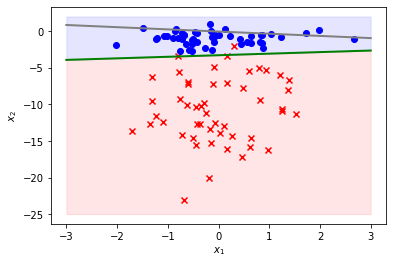

In [ ]:
# plot the boundary
fig, ax = plotBoundary(w2_init, xlims=[-3,3], ylims=[-25,3], color="0.5", fill=False)
plotBoundary(w2, xlims=[-3,3], ylims=[-25,2], fig=fig, ax =ax)
plotData(samples2_0, samples2_1, fig=fig, ax=ax)
# ax.set_xlim([-3,3])
# ax.set_ylim([-1,6])

Note that the logistic regression model doesn't have the same problem as the linear regression model.

## Naive Bayes Model
Let's now try a Naive Bayes model. This is a generative model. We will fit each dimension using a Gaussian distribution. We'll do a MLE estimate (but this is not robust; can you implement a MAP or Bayesian model?)


In [ ]:
from scipy.stats.morestats import ppcc_max
# we simply fit each class with its own parameters
# let's learn the more complex dataset. 

# class 0
mean_0 = np.mean(samples2_0, axis=0)
var_0 = np.var(samples2_0, axis=0)
theta_0 = [mean_0, var_0]
print("Class 0 parameters: ", theta_0)

c0 = stats.norm()

# class 1
mean_1 = np.mean(samples2_1, axis=0)
var_1 = np.var(samples2_1, axis=0)
theta_1 = [mean_1, var_1]
print("Class 1 parameters: ", theta_1)
print("\n")

# this is implemented to show you step-by-step how this is performed.
# for numerical stability, you would implement this differently. 
def classifyGaussNB(x, theta0, theta1):
  theta = [theta0, theta1]
  logpx_c = [0.0, 0.0] 
  for c in range(2):
    for d in range(x.shape[1]):
      logpx_c[c] += stats.norm.logpdf(x[0][d], theta[c][0][d], np.sqrt(theta[c][1][d])) 
      
  px = np.sum(exp(logpx_c))
  pc_x = exp(logpx_c) / px

  return np.argmax(pc_x), pc_x 


x = np.array([[0.0, 1.0]])
c_x, pc_x = classifyGaussNB(x, theta_0, theta_1)
print("x: ", x, "\n Class: ", c_x, "\n p(t|x) = ", pc_x.T)

Class 0 parameters:  [array([ -0.03683084, -10.73874084]), array([ 0.63789372, 19.63960879])]
Class 1 parameters:  [array([-0.09491091, -0.97097748]), array([0.82029304, 0.71800199])]


x:  [[0. 1.]] 
 Class:  1 
 p(t|x) =  [0.08889858 0.91110142]


In [ ]:
# It's 1 am so, I won't solve the decision boundaries but we'll let the computer plot it
i = 0
S = 201
xx1 = np.linspace(-3, 3, S)
xx2 = np.linspace(-25, 2, S)
c_x = np.zeros((S,S))
pc_x = np.zeros((S,S))
for i in range(S):
  for j in range(S):
    x1 = xx1[i]
    x2 = xx2[j]
    c_x[i,j], _ = classifyGaussNB(np.array([[x1, x2]]), theta_0, theta_1)
    
  

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d6ad37d90>)

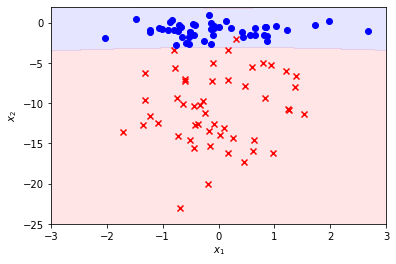

In [ ]:
fig, ax = plt.subplots()
cs = ax.contourf(xx1, xx2, c_x.T, [0.0, 0.5, 1.0], colors=['red', 'blue', 'blue'], alpha=0.1)
plotData(samples2_0, samples2_1, fig=fig, ax=ax)

The separating curve above does not look linear; why do you think that is?

## Summary
We've now managed to go from linear regression to linear classification. Reflect upon the key concepts learnt:
- Logistic Regression: how is it different from linear regression? 
- Discriminative v.s. Generative models: what are the connections? How are they similar and how are they different? 

Think about the following (again, you can modify the code if you want): 
- Basis Functions: how can you incorporate basis functions into the above? 
- Non-diagonal Covariance matrices: change the data to be from a Gaussian with "full" covariance matrices and explore the differences between the models.
- Can you extend the above towards multi-class classification?
- Do you think the bias-variance tradeoff also holds in classification? 